This tutorial is a showcase for the potential of `simframe`.

For this notebook you need `matplotlib` in addition to the `simframe` requirements.

# Coupled Oscillators

In this example we'll have a look at coupled oscillations of two bodies with masses $m_i$ connected via three springs with themselves and attached to walls. The goal is to calculate the time evolution of this system if it's not in equilibrium. The springs have spring constants of $k_i$ and lengths of $l_i$ when no forces are acting on them. The distance between the walls is $L$.

In [ ]:
k1, l1 = 1., 6.
k2, l2 = 2., 6.
k3, l3 = 1., 6.

m1, m2 = 1., 1.

L = 15.

Spring connected serially have a resulting spring constant of $K$, which is the inverse sum of the individual spring constants.

In [ ]:
Kinv = 1./k1 + 1./k2 + 1./k3
K    = 1./Kinv

The force exerted by a spring is given by

$\vec{F} = -k\cdot\vec{d}$

where $\vec{d}$ is the displacement vecor from its equilibrium position. The system can be more easily solved by solving for the time evolution of the displacements $\vec{d}_i$ of the bodies. To convert it back into actual coordinates, we first have to finde the equilibrium positions $\vec{x}_i$ of the bodies.

If the system is in equilibrium, the forces acting on each individual spring are identical.

In [3]:
F = - ( L - ( l1 + l2 + l3 ) ) * K

From this we can calculate the equilibrium positions.

In [4]:
x1 = l1 - F/k1

In [5]:
x2 = F/k3 + L - l3

In equilibrium our system looks as follows.

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [7]:
def plot_system(bw, x1, x2, L):

    fig, ax = plt.subplots(dpi=150)
    ax.axis("off")
    ax.set_aspect(1.)

    rectl = patches.Rectangle((-bw, -4.*bw), bw, 8.*bw, linewidth=1, edgecolor="#000000", facecolor="#dddddd", hatch="//")
    ax.add_patch(rectl)
    rectr = patches.Rectangle((L, -4.*bw), bw, 8.*bw, linewidth=1, edgecolor="#000000", facecolor="#dddddd", hatch="//")
    ax.add_patch(rectr)
    body1 = patches.Circle((x1, 0), bw, linewidth=1, edgecolor="#000000", facecolor="C1")
    ax.add_patch(body1)
    body2 = patches.Circle((x2, 0), bw, linewidth=1, edgecolor="#000000", facecolor="C9")
    ax.add_patch(body2)

    d, p = x1-0.-3.*bw, 0.+bw
    s1x = [0., p, p+1/8*d, p+3/8.*d, p+5/8.*d, p+7/8.*d, p+8/8.*d, p+8./8.*d+bw]
    s1y = [0., 0.,  2.*bw,   -2.*bw,    2.*bw,   -2.*bw,       0.,           0.]
    ax.plot(s1x, s1y, c="#000000", lw=1)

    d, p = x2-x1-4.*bw, x1+2.*bw
    s2x = [x1+bw, p, p+1/8*d, p+3/8.*d, p+5/8.*d, p+7/8.*d, p+8/8.*d, p+8./8.*d+bw]
    s2y = [0., 0.,  2.*bw,   -2.*bw,    2.*bw,   -2.*bw,       0.,           0.]
    ax.plot(s2x, s2y, c="#000000", lw=1)

    d, p = L-x2-3.*bw, x2+2.*bw
    s3x = [x2+bw, p, p+1/8*d, p+3/8.*d, p+5/8.*d, p+7/8.*d, p+8/8.*d, p+8./8.*d+bw]
    s3y = [0., 0.,  2.*bw,   -2.*bw,    2.*bw,   -2.*bw,       0.,           0.]
    ax.plot(s3x, s3y, c="#000000", lw=1)

    ax.set_xlim(-2.*bw, L+2.*bw)
    ax.set_ylim(-3., 3.)

    fig.tight_layout()
    
    return fig, ax

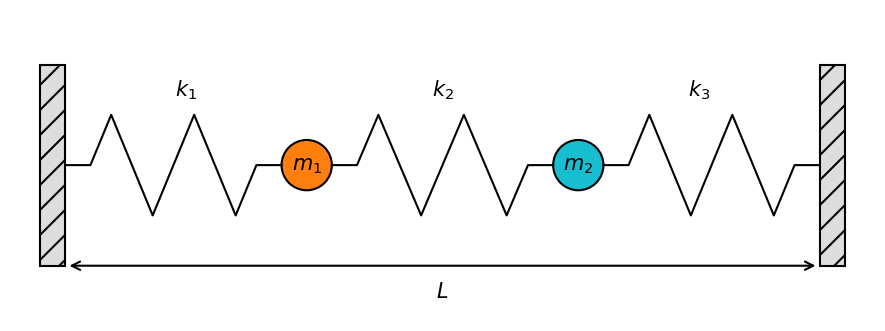

In [8]:
bw = 0.5
fig, ax = plot_system(bw, x1, x2, L)

ax.text((x1+0.)/2., 3*bw, "$k_1$", verticalalignment="center", horizontalalignment="center")
ax.text((x2+x1)/2., 3*bw, "$k_2$", verticalalignment="center", horizontalalignment="center")
ax.text((L +x2)/2., 3*bw, "$k_3$", verticalalignment="center", horizontalalignment="center")

ax.text(x1, 0., "$m_1$", verticalalignment="center", horizontalalignment="center")
ax.text(x2, 0., "$m_2$", verticalalignment="center", horizontalalignment="center")

ax.annotate(s='', xy=(0., -4.*bw), xytext=(L, -4.*bw), arrowprops=dict(arrowstyle='<->', lw=1))
ax.text(L/2, -5.*bw, "$L$", verticalalignment="center", horizontalalignment="center")

plt.show()

We know want to displace mass $m_1$ from its equilibrium position and calculate the time evolution of the whole system.

The force acting on $m_1$ is given by

$F_1 = m\dot{v_1} = -(k_1 + k_2) \cdot d_1 + k_2 \cdot d_2$

Vector notation is ommited since the problem is one-dimensional. The change in the displacement $d_1$ is given by

$\dot{d_1} = v_1$

Similarily for the second body

$F_2 = m\dot{v_2} = -(k_2 + k_3) \cdot d_2 + k_2 \cdot d_1$

$\dot{d_2} = v_2$

This is a system of coupled differential equations that can be written in matrix form

$\begin{pmatrix} \dot{d_1} \\ \dot{d_2} \\ \dot{v_1} \\ \dot{v_2} \end{pmatrix} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & 0 & 0 \\ \frac{k_2}{m_2} & -\frac{k_2+k_3}{m_2} & 0 & 0 \end{pmatrix} \cdot \begin{pmatrix} d_1 \\ d_2 \\ v_1 \\ v_2 \end{pmatrix}$

or short

$\frac{\mathrm{d}}{\mathrm{d}t} \vec{Y} = \mathbf{J} \cdot \vec{Y}$

with the state vector $\vec{Y}$ and the Jacobian $\mathbf{J}$.

We can now start setting up the frame.

In [9]:
from simframe import Frame

In [10]:
sim = Frame(description="Coupled Springs")

In [11]:
import numpy as np

In [12]:
Y = np.array([-3., 0., 0., 0.])
sim.addfield("Y", Y, description="State vector")

In this configuration mass $m_1$ is displaced by $3$ to the left while $m_2$ is in its equilibrium position. Both bodies are at rest.

We set up the time as integration variable.

In [13]:
sim.addintegrationvariable("t", 0., description="Time")

In [14]:
def dt(sim):
    return 0.1

In [15]:
sim.t.updater = dt

In [16]:
sim.t.snapshots = np.arange(.1, 50., .1)

In principle this would be enough to run the simulation. But for convenience we set up a few more fields and groups.

In [17]:
sim.addgroup("b1", description="Body 1")
sim.addgroup("b2", description="Body 2")

# Body 1
sim.b1.addfield("m" , m1, description="Mass", constant=True)
sim.b1.addfield("d" , 0., description="Displacement")
sim.b1.addfield("x" , 0., description="Position")
sim.b1.addfield("x0", x1, description="Equilibrium Position", constant=True)
sim.b1.addfield("v" , 0., description="Velocity")

# Body 2
sim.b2.addfield("m" , m2, description="Mass", constant=True)
sim.b2.addfield("d" , 0., description="Displacement")
sim.b2.addfield("x" , 0., description="Position")
sim.b2.addfield("x0", x2, description="Equilibrium Position", constant=True)
sim.b2.addfield("v" , 0., description="Velocity")

These fields need to be updated from the state vector.

In [18]:
# Body 1
def update_d1(sim):
    return sim.Y[0]
sim.b1.d.updater = update_d1
def update_v1(sim):
    return  sim.Y[2]
sim.b1.v.updater = update_v1
def update_x1(sim):
    return sim.b1.x0 + sim.b1.d
sim.b1.x.updater = update_x1

# Body 2
def update_d2(sim):
    return sim.Y[1]
sim.b2.d.updater = update_d2
def update_v2(sim):
    return  sim.Y[3]
sim.b2.v.updater = update_v2
def update_x2(sim):
    return sim.b2.x0 + sim.b2.d
sim.b2.x.updater = update_x2

And we are adding more groups for the spring parameters.

In [19]:
sim.addgroup("s1", description="Spring 1")
sim.addgroup("s2", description="Spring 2")
sim.addgroup("s3", description="Spring 3")

sim.s1.addfield("k", k1, description="Spring Constant", constant=True)
sim.s1.addfield("l", l1, description="Length", constant=True)
sim.s2.addfield("k", k2, description="Spring Constant", constant=True)
sim.s2.addfield("l", l2, description="Length", constant=True)
sim.s3.addfield("k", k3, description="Spring Constant", constant=True)
sim.s3.addfield("l", l3, description="Length", constant=True)

We now have to tell `simframe` in what order to update the fields.

In [20]:
# The groups for the bodies. The order does not matter
sim.updater = ["b1", "b2"]
# The fields in the groups. Displacement has to be updated before position
sim.b1.updater = ["d", "v", "x"]
sim.b2.updater = ["d", "v", "x"]

We can now fill the fields with their initial conditions from the state vector.

In [21]:
sim.update()

The initial state of the system looks as follows:

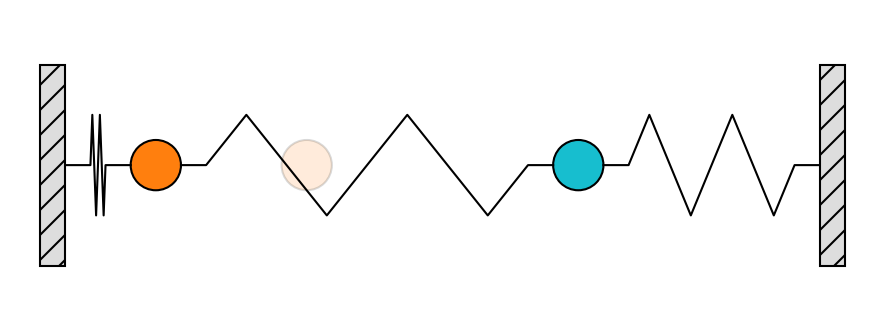

In [22]:
fig, ax = plot_system(0.5, sim.b1.x, sim.b2.x, L)
circ = patches.Circle((sim.b1.x0, 0.), 0.5, linewidth=1, edgecolor="#000000", facecolor="C1", alpha=0.15)
ax.add_patch(circ)
plt.show()

**Printing the complete frame structure**

In [23]:
sim.toc

Frame (Coupled Springs)
    - b1: Group (Body 1)
        - d: Field (Displacement)
        - m: Field (Mass), constant
        - v: Field (Velocity)
        - x: Field (Position)
        - x0: Field (Equilibrium Position), constant
    - b2: Group (Body 2)
        - d: Field (Displacement)
        - m: Field (Mass), constant
        - v: Field (Velocity)
        - x: Field (Position)
        - x0: Field (Equilibrium Position), constant
    - s1: Group (Spring 1)
        - k: Field (Spring Constant), constant
        - l: Field (Length), constant
    - s2: Group (Spring 2)
        - k: Field (Spring Constant), constant
        - l: Field (Length), constant
    - s3: Group (Spring 3)
        - k: Field (Spring Constant), constant
        - l: Field (Length), constant
    - t: Field (Time), Integration variable
    - Y: Field (State vector)


**Setting up the Jacobian**

For implicit schemes we have to calculate the Jacobian. Since in this case the Jacobian is constant with time, we can define it outside of the frame object.

In [24]:
jac = np.array([[                           0.,                            0., 1., 0.],
                [                           0.,                            0., 0., 1.],
                [-(sim.s1.k+sim.s2.k)/sim.b1.m,             sim.s2.k/sim.b1.m, 0., 0.],
                [            sim.s2.k/sim.b2.m, -(sim.s2.k+sim.s3.k)/sim.b2.m, 0., 0.]])

In [25]:
jac

array([[ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.],
       [-3.,  2.,  0.,  0.],
       [ 2., -3.,  0.,  0.]])

For implicit schemes, the differentiator of the state field has to return the Jacobian.

In [26]:
def diff_impl(sim, x, Y):
    return jac

In [27]:
sim.Y.differentiator = diff_impl

**Setting up the Integrator**

We can now set up the integrator just as in the previous examples.

In [28]:
from simframe import Integrator
from simframe import Instruction
from simframe import schemes

In [29]:
sim.integrator = Integrator(sim.t)

In [30]:
sim.integrator.instructions = [Instruction(schemes.impl_1_euler_gmres, sim.Y)]

**Setting up the Writer**

We also have to set up the writer. In this case we don't want to write data files. So we simply write the data into a namespace

In [31]:
from simframe import writers

In [32]:
sim.writer = writers.namespacewriter
sim.writer.dumping = False
sim.writer.verbosity = 0

**Starting the simulation**

In [33]:
sim.run()

**Reading data**

In [34]:
data = sim.writer.read.all()

In [35]:
def plot_oszillations(data):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(data.b1.x, data.t, c="C1")
    ax.plot(data.b2.x, data.t, c="C9")
    ax.axvline(data.b1.x0[0], c="#000000", alpha=0.5, lw=1)
    ax.axvline(data.b2.x0[0], c="#000000", alpha=0.5, lw=1)
    ax.set_xlim(0, L)
    ax.set_ylim(data.t[-1], data.t[0])
    ax.set_xlabel("Position")
    ax.set_ylabel("Time")
    fig.tight_layout()

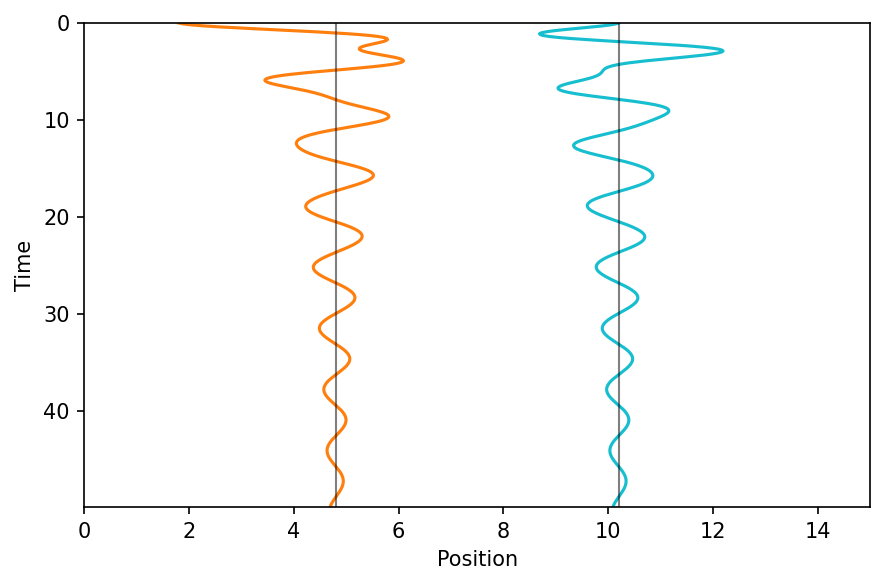

In [36]:
plot_oszillations(data)

In [37]:
from matplotlib import animation
from IPython.display import HTML

In [38]:
def getspring(l1, l2, bw):
    L = l2 - l1
    d = L/6.
    x = np.array([l1, d, d/2., d, d, d, d/2., d])
    for i in range(1, 8):
        x[i] += x[i-1]
    y = np.array([0., 0., 2.*bw, -2.*bw, 2.*bw, -2*bw, 0., 0.])
    return x, y

In [39]:
def plot_animation(data, bw):
    fig, ax = plt.subplots()
    ax.axis("off")
    ax.set_aspect(1.)
    l1, = ax.plot(data.b1.x, data.t-data.t[0], c="C1", lw=2, zorder=-1)
    l2, = ax.plot(data.b2.x, data.t-data.t[0], c="C9", lw=2, zorder=-1)
    rectl = patches.Rectangle((-bw, -4.*bw), bw, 8.*bw, linewidth=1, edgecolor="#000000", facecolor="#dddddd", hatch="//")
    ax.add_patch(rectl)
    rectr = patches.Rectangle((L, -4.*bw), bw, 8.*bw, linewidth=1, edgecolor="#000000", facecolor="#dddddd", hatch="//")
    ax.add_patch(rectr)
    ax.set_xlim(-2.*bw, L+2.*bw)
    ax.set_ylim(-5., 5.)
    b1 = patches.Circle((data.b1.x[0], 0), bw, linewidth=1, edgecolor="#000000", facecolor="C1")
    ax.add_patch(b1)
    b2 = patches.Circle((data.b2.x[0], 0), bw, linewidth=1, edgecolor="#000000", facecolor="C9")
    ax.add_patch(b2)
    x, y = getspring(0., data.b1.x[0]-bw, bw)
    s1, = ax.plot(x, y, c="#000000", lw=1)
    x, y = getspring(data.b1.x[0]+bw, data.b2.x[0]-bw, bw)
    s2, = ax.plot(x, y, c="#000000", lw=1)
    x, y = getspring(data.b2.x[0]+bw, L, bw)
    s3, = ax.plot(x, y, c="#000000", lw=1)
    return fig, ax, l1, l2, b1, b2, s1, s2, s3 

In [40]:
def init():
    l1.set_data(data.b1.x, data.t-data.t[0])
    l2.set_data(data.b2.x, data.t-data.t[0])
    b1.center = (data.b1.x[0], 0.)
    ax.add_patch(b1)
    b2.center = (data.b2.x[0], 0.)
    ax.add_patch(b2)
    x, y = getspring(0., data.b1.x[0]-bw, bw)
    s1.set_data(x, y)
    x, y = getspring(data.b1.x[0]+bw, data.b2.x[0]-bw, bw)
    s2.set_data(x, y)
    x, y = getspring(data.b2.x[0]+bw, L, bw)
    s3.set_data(x, y)
    return l1, l2, b1, b2, s1, s2, s3

In [41]:
def animate(i):
    l1.set_data(data.b1.x, data.t-data.t[i])
    l2.set_data(data.b2.x, data.t-data.t[i])
    b1.center = (data.b1.x[i], 0.)
    b2.center = (data.b2.x[i], 0.)
    x, y = getspring(0., data.b1.x[i]-bw, bw)
    s1.set_data(x, y)
    x, y = getspring(data.b1.x[i]+bw, data.b2.x[i]-bw, bw)
    s2.set_data(x, y)
    x, y = getspring(data.b2.x[i]+bw, L, bw)
    s3.set_data(x, y)
    return l1, l2, b1, b2, s1, s2, s3

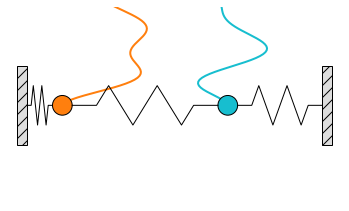

In [42]:
fig, ax, l1, l2, b1, b2, s1, s2, s3 = plot_animation(data, 0.5)

In [43]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data.t), interval=30, blit=True)

In [44]:
HTML(anim.to_html5_video())

As you can see the oscillation is damped pretty quickly, which is weird because we did not include any damping term into our differential equations for the velocities. The damping is purely numerically.

The cause for the damping is the implicit integrator. Implicit integrators are good for finding equilibrium solutions but often fail for highly dynamic systems. So we restart the simulation using an explicit integration scheme.

**Resetting**

In [45]:
sim.Y = (-3., 0., 0., 0)
sim.update()
sim.t = 0
sim.writer.reset()

For explicit integration the differentiator has to return the derivative and not the Jacobian. But we can simply calculate the derivative from the Jacobian as seen earlier

$\frac{\mathrm{d}}{\mathrm{d}t} \vec{Y} = \mathbb{J} \cdot \vec{Y}$

In [46]:
def diff_expl(sim, x, Y):
    return np.dot(jac, Y)

In [47]:
sim.Y.differentiator = diff_expl

In [48]:
sim.integrator.instructions = [Instruction(schemes.expl_4_runge_kutta, sim.Y)]

def dt(sim):
    return sim.t.suggested

sim.t.updater = dt

sim.t.suggest(0.1)

In [49]:
sim.run()

In [50]:
data = sim.writer.read.all()

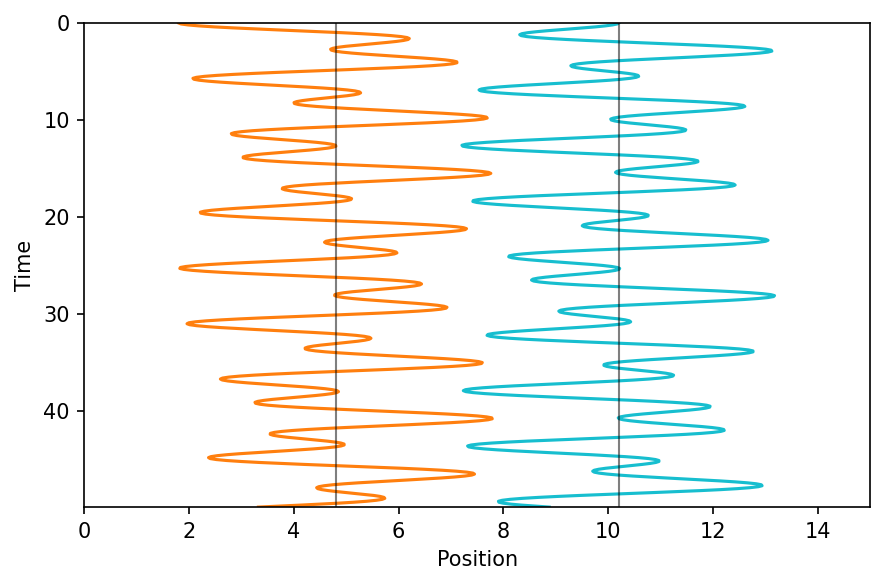

In [51]:
plot_oszillations(data)

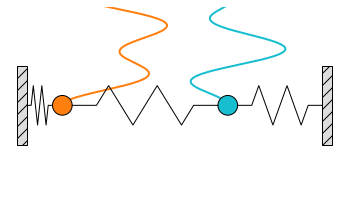

In [52]:
fig, ax, l1, l2, b1, b2, s1, s2, s3 = plot_animation(data, 0.5)

In [53]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(data.t), interval=30, blit=True)

In [54]:
HTML(anim.to_html5_video())

Now the numerical damping is gone.